In [1]:
import pandas as pd
import numpy as np

In [52]:
!pip install Unidecode

<h2> 1) Agrupación de los dataframes (se usaran los datos desde 2008 en adelante)</h2>

In [2]:
lists = []
for date in range(2008,2018):
    df = pd.read_csv('NAC_{}.csv'.format(date),sep=";", encoding="ISO-8859-1",low_memory=False)
    lists.append(df)
    
df_final = pd.concat(lists)

In [54]:
df_final.shape

(2429064, 33)

In [55]:
df_final.columns

Index(['SEXO', 'DIA_NAC', 'MES_NAC', 'ANO_NAC', 'TIPO_PARTO', 'ATENC_PART',
       'LOCAL_PART', 'SEMANAS', 'PESO', 'TALLA', 'EDAD_P', 'CURSO_P',
       'NIVEL_P', 'ACTIV_P', 'OCUPA_P', 'CATEG_P', 'EDAD_M', 'EST_CIVI_M',
       'CURSO_M', 'NIVEL_M', 'ACTIV_M', 'OCUPA_M', 'CATEG_M', 'COMUNA',
       'URBA_RURAL', 'HIJ_VIVOS', 'HIJ_FALL', 'HIJ_MORT', 'HIJ_TOTAL',
       'REG_RES', 'SERV_RES', 'ESTAB', 'NAC_MA'],
      dtype='object')

<h2> 2) Cuál es el mes más frecuente de nacimientos en Chile </h2>
<p>Consideraremos cada fila como un nacimiento, mediante un conteo de cada mes veremos cuál es el más frecuente</p>

<h5> El mes más frecuente es Enero, seguido de Marzo </h5>

In [3]:
df_final['MES_NAC'].value_counts().nlargest(10)

1     213303
3     212808
9     206195
12    203226
5     202720
7     202287
4     201891
10    201783
8     200377
6     199799
Name: MES_NAC, dtype: int64

<h2>3) Cuál es el dia más frecuente de nacimientos</h2>
<p>Consideraremos cada fila como un nacimiento y agruparemos de acuerdo a mes y dia junto al atributo size() que servira como un contador de frecuencias</p>

<h5> El dia más frecuente es  15 Sept, seguido del 23 del mismo mes </h5>

In [5]:
df_final.groupby(['MES_NAC','DIA_NAC']).size().nlargest(10)

MES_NAC  DIA_NAC
9        15         7864
         23         7841
12       26         7838
         27         7811
9        12         7782
         14         7736
12       28         7734
9        22         7689
         9          7635
1        28         7567
dtype: int64

<h2>4) Covarianza y correlación entre peso y talla </h2>

<p>Calcularemos la covarianza y la correlación entre el peso y la talla, para ello antes del analisis eliminaremos los datos "outsiders", que son aquellos donde el <b>PESO</b>=9999 y  <b>TALLA</b>=99, dado que estos datos desvian el resultado real </p>

<h5> La correlación entre las variables se mantiene estable entre 0.8-0.86, lo que indica una alta relación entre la variable PESO y TALLA</h5>

<h5> La covarianza entre las variables se aumenta considerablemente desde los 1100-1050 hasta los 1240-1260</h5>

<h5>Recordemos que la correlación y la varianza se relacionan directamente, en este caso al ser los resultados positivos,se puede concluir una relación lineal positiva entre las variables  </h5>


<h2>$\rho_{X,Y}={\sigma_{XY} \over \sigma_X \sigma_Y} ={E[(X-\mu_X)(Y-\mu_Y)] \over \sigma_X\sigma_Y}$</h2>


In [6]:
df_final[["PESO","TALLA"]].cov()

,PESO,TALLA
PESO,378038.122419,1713.520425
TALLA,1713.520425,10.687249


<h4>A partir del histograma podemos observar la presencia de datos anomálos, estos datos posiblemente se generan ante una falla en el proceso de recopilación, donde por defecto se asigna valor 9999 ó 99 según sea Peso o Talla </h4>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026200C3DF48>,
      dtype=object)

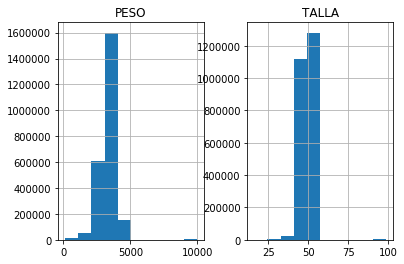

In [7]:
df_final[["PESO","TALLA"]].hist()

<h4>Eliminaremos los datos anomálos y veremos nuevamente el histograma</h4>

In [8]:
df_pesotalla = df_final[~((df_final["PESO"] == 9999) | (df_final["TALLA"] == 99))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002620374C848>,
      dtype=object)

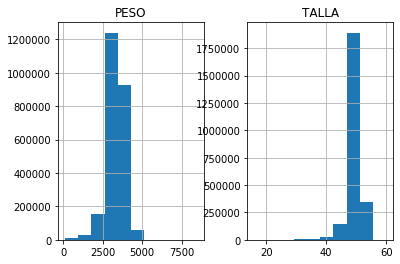

In [9]:
df_pesotalla[["PESO","TALLA"]].hist()

<h3>Covarianza y correlación desde el 2008 en adelante</h3>

<h3>Covarianza 2008-2017</h3>

In [14]:
df_pesotalla[["PESO","TALLA"]].cov()

,PESO,TALLA
PESO,303337.914000,1165.943081
TALLA,1165.943081,6.558821


<h3>Correlación 2008-2017</h3>

In [27]:
df_pesotalla[["PESO","TALLA"]].corr(method='pearson')

,PESO,TALLA
PESO,1.000000,0.826611
TALLA,0.826611,1.000000


<h3>Correlación y covarianza a lo largo del tiempo, periodo 2008 en adelante</h3>

[Text(0, 0, '0'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.9'),
 Text(0, 0, '1000'),
 Text(0, 0, '1100'),
 Text(0, 0, '1200')]

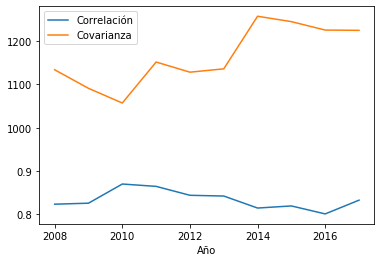

In [35]:
list_of_values = []
for date in range(2008,2018):
    df = df_pesotalla[df_pesotalla["ANO_NAC"] == date][["PESO","TALLA"]]
    correlacion = df.corr(method='pearson')
    cov = df.cov()
    print(correlacion["PESO"]["TALLA"], cov["PESO"]["TALLA"])
    list_of_values.append([date, 1000*correlacion["PESO"]["TALLA"], cov["PESO"]["TALLA"]])
    
df = pd.DataFrame(list_of_values,columns=['Año','Correlación','Covarianza'])
ax = df.plot(x='Año')
ax.set_xlabel("Año")
ax.set_yticklabels([0,0.8,0.9,1000,1100,1200])


<h2>5) Covarianza y correlación entre EDAD_M y EDAD_P</h2>

<p>Calcularemos la covarianza y la correlación entre EDAD_M y EDAD_M, para ello antes del analisis eliminaremos <br> los datos "outsiders", que son aquellos donde EDAD_M=99 y EDAD_P=99</p>

<h5 align="center"> La correlación entre las variables se mantiene estable entre 0.73-0.74, salvo un caso excepcional,<br> esto indica una alta correlación entre las edades de la madre y del padre</h5>

<h5 align="center"> La covarianza entre las variables se disminuye de un rango 39-40 al rango 33-35, esto indica que hay menor dispersion en la edad de las parejas</h5>

<h4>Histograma para la visualización de datos anomalos</h4>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026204A21648>,
      dtype=object)

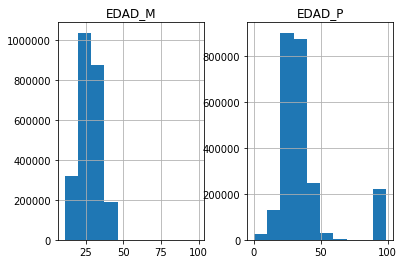

In [36]:
df_final[["EDAD_P","EDAD_M"]].hist()

<h4>Limpieza de datos</h4>

In [37]:
df_edadmp = df_final[~((df_final["EDAD_P"] == 99) | (df_final["EDAD_M"] == 99))]

<h3>Covarianza 2008-2017</h3>

In [38]:
df_edadmp[["EDAD_P","EDAD_M"]].cov()

,EDAD_P,EDAD_M
EDAD_P,70.386481,38.790094
EDAD_M,38.790094,44.023446


<h3>Corelación 2008-2017</h3>

In [39]:
df_edadmp[["EDAD_P","EDAD_M"]].corr(method='pearson')

,EDAD_P,EDAD_M
EDAD_P,1.000000,0.696842
EDAD_M,0.696842,1.000000


0.7365859300954658 39.36472690969655
0.739585466017772 39.54238526652022
0.7423519905809942 39.6697341749938
0.7473734159775628 39.8529460951129
0.7478780048679916 39.53493599275854
0.537794087953219 42.662618173102885
0.7428178611703714 37.53603781052492
0.7373886965480924 36.60893993373831
0.7303131801238267 35.27718861653602
0.7213269000171864 33.92793424945149


[Text(0, 0, '0'),
 Text(0, 0, '0.7'),
 Text(0, 0, '0.8'),
 Text(0, 0, '35'),
 Text(0, 0, '40'),
 Text(0, 0, '50')]

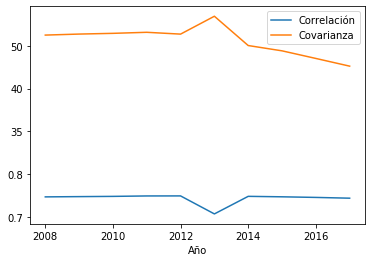

In [44]:
list_of_values = []
for date in range(2008,2018):
    df = df_edadmp[df_edadmp["ANO_NAC"] == date][["EDAD_P","EDAD_M"]]
    correlacion = df.corr(method='pearson')
    cov = df.cov()
    print(correlacion["EDAD_P"]["EDAD_M"], cov["EDAD_P"]["EDAD_M"])
    list_of_values.append([date, correlacion["EDAD_P"]["EDAD_M"], cov["EDAD_P"]["EDAD_M"]/15])
df = pd.DataFrame(list_of_values,columns=['Año','Correlación','Covarianza'])
ax = df.plot(x='Año')
ax.set_xlabel("Año")
ax.set_yticklabels([0,0.7,0.8,35,40,50])


<h2>6) Condiciones de nacimiento: Prematuro, a término y póstermino</h2>

<h5 align="center">Condiciones de nacimiento</h5>
<p> Prematuro: menor 37 semanas </p>
<p> A término: entre 37 y 42 semanas </p>
<p> Póstermino: mayor a 42 semanas </p>


<h4 align="center">Para este ejercicio usaremos el df_pesotalla, dado que es un ejercicio orientado a analizar las columnas PESO y TALLA </h4>
<h5 align="center"> En los boxplot se puede ver una relación entre las semanas de gestación y el peso como la talla de nacimiento,<br> eso si cabe destacar el alto numero de datos aislados (fuera del bigote de la caja) en el peso de nacidos prematuros,<br> quienes tienden a nacer con bajo peso</h5>


In [45]:
df_sem = df_pesotalla
df_sem

df_sem["categoria"] = pd.cut(df_sem["SEMANAS"],
                 [0, 37, 42, np.inf],
                 labels=['prematuro','a termino','postermino']
          )
df_sem

C:\Users\usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,URBA_RURAL,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,categoria
0,1,4,1,2008,1,2,1,36,2930,47,...,1,1,0.0,0.0,1,13,13,HOSPITAL EL PINO,NaN,prematuro
1,1,5,1,2008,1,2,1,37,3945,51,...,1,4,0.0,0.0,4,13,12,CLINICA ALEMANA,NaN,prematuro
2,1,1,1,2008,1,1,1,41,2940,49,...,1,1,0.0,0.0,1,5,6,HOSPITAL CARLOS VAN BUREN,NaN,a termino
3,1,4,1,2008,1,2,1,39,2950,49,...,1,1,0.0,0.0,1,5,7,HOSPITAL DE QUILPUE,NaN,a termino
4,2,4,1,2008,1,2,1,37,3070,48,...,1,2,0.0,0.0,2,2,3,Clinica de la Mujer,NaN,prematuro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219180,1,28,12,2017,1,2,1,40,3735,52,...,1,3,0.0,0.0,3,8,20,HOSPITAL VICTOR RIOS RUIZ,C,a termino
219181,2,16,12,2017,1,1,1,37,2735,48,...,1,2,0.0,0.0,2,13,9,Clinica Indisa,C,prematuro
219183,2,15,12,2017,1,1,1,38,3860,50,...,1,99,99.0,99.0,3,13,9,Clinica Santa Maria,C,a termino
219184,2,29,12,2017,1,2,9,39,3370,48,...,1,1,0.0,0.0,1,6,15,Sin Especificar,,a termino


In [46]:
import seaborn as sns

<h3>Boxplot de Peso según categoria (Prematuro, a término y postermino)</h3>

<p>Podemos observar que el peso del recién nacido aumenta en la medida que tenga más semanas de gestación <br>
 También podemos observar una gran dispersión de datos en el primer cuartil de la categoria prematuro
                                                                                                              </p>

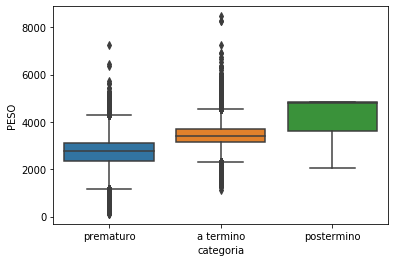

In [47]:
sns.boxplot(x="categoria", y="PESO", data=df_sem)

<h3>Boxplot de Talla según categoria (Prematuro, a término y postermino)</h3>

<p>Podemos observar que la talla del recién nacido aumenta en la medida que tenga más semanas de gestación <br>
 También podemos observar una gran dispersión de datos en el primer cuartil de la categoria prematuro y a término
                                                                                                              </p>

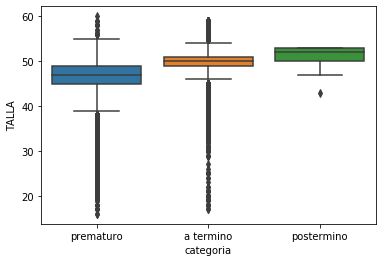

In [49]:
sns.boxplot(x="categoria", y="TALLA", data=df_sem)

<h2>7) Casos nacidos en ambulancia y en trayecto</h2>

<p>Debemos crear una nueva columna donde, dependiendo si la col. ESTAB contiene el string "ambulancia" el indicador vale 1, <br>y  por otro lado, si contiene "trayecto" el valor es 0. <br>Podemos ver que la distribución de los datos son similares, vale decir, que al parecer no existirian caracteristicas propias del recien nacido o de los padres que ayuden a  distinguir entre si esté nacio en TRAYECTO o AMBULANCIA</p>

<h6>Respecto a los "outlires", en base a los distintos boxplot podemos ver que no hay datos atipicos, independiente sea la categoria</h6>

In [65]:
df_casos_amb_tray = df_final[df_final["ESTAB"].str.contains('TRAYECTO|AMBULA', na=False)]

In [66]:
df_casos_amb_tray["indicadordenacimiento"] = np.where(df_casos_amb_tray["ESTAB"].str.contains('AMBULA'),1,2)

C:\Users\usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_casos_amb_tray.shape

(219, 34)

In [68]:
df_casos_amb_tray.head(50)

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,URBA_RURAL,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,indicadordenacimiento
33100,1,21,6,2008,1,2,3,39,3180,49,...,2,2,0.0,0.0,2,7,16,AMBULANCIA SAMU LINARES,NaN,1
41809,2,8,2,2008,1,3,3,37,3100,48,...,2,2,0.0,0.0,2,10,33,AMBULANCIA ANCUD,NaN,1
55380,1,16,8,2008,9,9,3,99,9999,99,...,1,1,0.0,0.0,1,7,16,CONSULTORIO SAN CLEMENTE EN LA AMBULANCIA,NaN,1
64962,1,13,1,2008,1,3,3,39,3104,48,...,1,3,0.0,0.0,3,12,26,AMBULANCIA,NaN,1
70052,2,29,3,2008,1,2,3,37,2540,46,...,2,4,0.0,0.0,4,1,2,AMBULANCIA EN TRAYECTO,NaN,1
78671,2,10,1,2008,1,2,3,38,3334,50,...,1,2,0.0,0.0,2,3,4,EN AMBULANCIA POBL.LA COLINA,NaN,1
97422,2,24,5,2008,1,2,3,39,3212,50,...,1,4,0.0,0.0,4,3,4,TRAYECTO CALDERA COPIAPO EN AMBULANCIA KMT.8,NaN,1
118328,2,17,3,2008,1,2,3,38,2780,48,...,1,2,0.0,0.0,2,14,22,AMBULANCIA,NaN,1
119960,2,25,5,2008,1,3,3,40,3150,48,...,2,1,0.0,0.0,1,9,21,AMBULANCIA HOSPITAL PUCON,NaN,1
138316,1,10,7,2008,1,4,3,40,3490,51,...,1,1,0.0,0.0,1,14,22,AMBULANCIA SAMU - LA UNION,NaN,1


[Text(0, 0, 'AMBULANCIA'), Text(0, 0, 'TRAYECTO')]

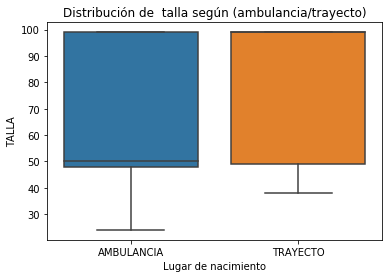

In [73]:
ax0 = sns.boxplot(x="indicadordenacimiento", y="TALLA", data=df_casos_amb_tray)
ax0.set_title("Distribución de  talla según (ambulancia/trayecto)")
ax0.set_xlabel("Lugar de nacimiento")
ax0.set_xticklabels(["AMBULANCIA","TRAYECTO"])


[Text(0, 0, 'AMBULANCIA'), Text(0, 0, 'TRAYECTO')]

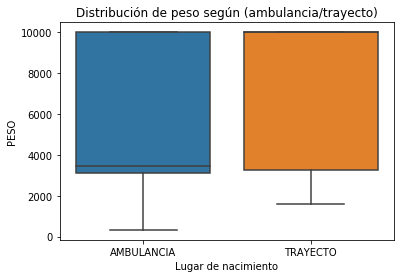

In [74]:
ax1 = sns.boxplot(x="indicadordenacimiento", y="PESO", data=df_casos_amb_tray)
ax1.set_title("Distribución de peso según (ambulancia/trayecto)")
ax1.set_xlabel("Lugar de nacimiento")
ax1.set_xticklabels(["AMBULANCIA","TRAYECTO"])

[Text(0, 0, 'AMBULANCIA'), Text(0, 0, 'TRAYECTO')]

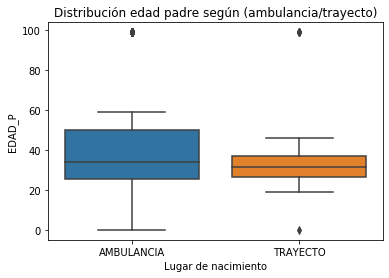

In [77]:
ax2 = sns.boxplot(x="indicadordenacimiento", y="EDAD_P", data=df_casos_amb_tray)
ax2.set_title("Distribución edad padre según (ambulancia/trayecto)")
ax2.set_xlabel("Lugar de nacimiento")
ax2.set_xticklabels(["AMBULANCIA","TRAYECTO"])

[Text(0, 0, 'AMBULANCIA'), Text(0, 0, 'TRAYECTO')]

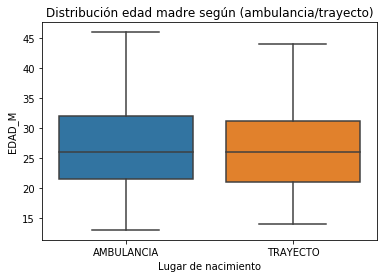

In [78]:
ax3 = sns.boxplot(x="indicadordenacimiento", y="EDAD_M", data=df_casos_amb_tray)
ax3.set_title("Distribución edad madre según (ambulancia/trayecto)")
ax3.set_xlabel("Lugar de nacimiento")
ax3.set_xticklabels(["AMBULANCIA","TRAYECTO"])

<h2>8) Distribución según lugar de nacimiento</h2>

<p>Para este ejercicio, consideraremos tres categorias distintivas, Hospital, Clinica y otros, cabe señalar que todo string que contenga el valor Clinica/Clinico sera considerado como clinica, a modo de ejemplo el Hospital Clinico de la Universidad de Chile se consideraria una Clinica</p>

<table style="width:100%">
  <tr>
    <th>String</th>
    <th>Valor</th>
  </tr>
  <tr>
    <td>Hospital</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Clinica</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Otro</td>
    <td>0</td>
  </tr>
</table>

In [82]:
import unidecode

In [80]:
df_final["ESTAB"] = df_final["ESTAB"].apply(lambda x: unidecode.unidecode(str(x)).upper())

In [86]:
df_final["ESTAB"]

0                       HOSPITAL EL PINO
1                        CLINICA ALEMANA
2              HOSPITAL CARLOS VAN BUREN
3                    HOSPITAL DE QUILPUE
4                    CLINICA DE LA MUJER
                       ...              
219181                    CLINICA INDISA
219182               PARTOS EN DOMICILIO
219183               CLINICA SANTA MARIA
219184                   SIN ESPECIFICAR
219185    HOSPITAL DR HERNAN HENRIQUEZ A
Name: ESTAB, Length: 2429064, dtype: object

In [87]:
df_final["tipoestablecimiento"] = df_final["ESTAB"].apply(lambda x: 1 if "CLINIC" in x else (2 if "HOSPITAL" in x else 0) )

In [88]:
df_final

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,URBA_RURAL,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,tipoestablecimiento
0,1,4,1,2008,1,2,1,36,2930,47,...,1,1,0.0,0.0,1,13,13,HOSPITAL EL PINO,NaN,2
1,1,5,1,2008,1,2,1,37,3945,51,...,1,4,0.0,0.0,4,13,12,CLINICA ALEMANA,NaN,1
2,1,1,1,2008,1,1,1,41,2940,49,...,1,1,0.0,0.0,1,5,6,HOSPITAL CARLOS VAN BUREN,NaN,2
3,1,4,1,2008,1,2,1,39,2950,49,...,1,1,0.0,0.0,1,5,7,HOSPITAL DE QUILPUE,NaN,2
4,2,4,1,2008,1,2,1,37,3070,48,...,1,2,0.0,0.0,2,2,3,CLINICA DE LA MUJER,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219181,2,16,12,2017,1,1,1,37,2735,48,...,1,2,0.0,0.0,2,13,9,CLINICA INDISA,C,1
219182,2,30,12,2017,9,9,2,99,9999,99,...,1,99,99.0,99.0,2,13,9,PARTOS EN DOMICILIO,C,0
219183,2,15,12,2017,1,1,1,38,3860,50,...,1,99,99.0,99.0,3,13,9,CLINICA SANTA MARIA,C,1
219184,2,29,12,2017,1,2,9,39,3370,48,...,1,1,0.0,0.0,1,6,15,SIN ESPECIFICAR,,0


In [89]:
g1 = df_final.groupby(["ANO_NAC", "tipoestablecimiento"]).size().to_frame('frecuency')
g1

frecuency
ANO_NAC tipoestablecimiento           
2008    0                         7809
        1                        69241
        2                       169531
2009    0                         8795
        1                        69860
        2                       173585
2010    0                        10157
        1                        70551
        2                       169935
2011    0                         5292
        1                        76289
        2                       165777
2012    0                         5725
        1                        79012
        2                       158898
2013    0                         5893
        1                        81201
        2                       154911
2014    0                         7605
        1                        84043
        2                       159349
2015    0                        10915
        1                        81785
        2                       151970
2016    0                        11391
        1                        78408
        2                       141950
2017    0                        12892
        1                        73120
        2                       133174

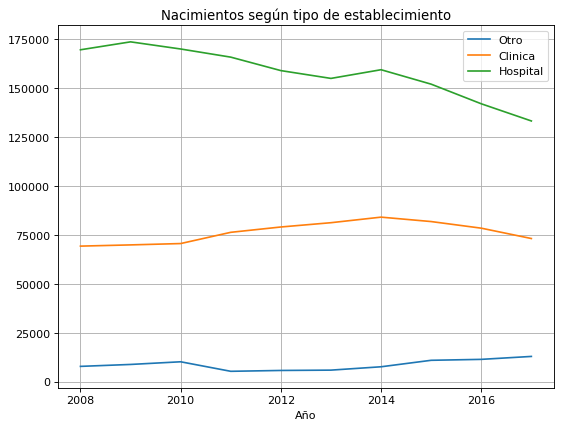

In [98]:
from matplotlib import pyplot as plt
f, a = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi= 80)
ax = g1.reset_index().pivot('ANO_NAC','tipoestablecimiento','frecuency').plot(ax=a, title='Nacimientos según tipo de establecimiento', grid=True)
ax.set_xlabel("Año")
ax.legend(["Otro", "Clinica","Hospital"])



<p>Respecto al gráfico anterior, cabe destacar la disminución de nacimientos en Chile a lo largo del 2008 </p>

<h2>9) Intervalo de confianza e intervalo con quartiles</h2>

<h4>Filtro según talla y peso</h4>

In [99]:
data_talla = df_final["TALLA"]
data_peso = df_final["PESO"]

In [100]:
import statistics
import numpy as np

<h3>Intervalo de confianza para el Peso</h3>

In [101]:
promedio_p = statistics.mean(data_peso) 
desv_p = statistics.stdev(data_peso)
n_p = len(data_peso)

In [103]:
(promedio_p-1.96*desv_p/np.sqrt(n_p), promedio_p+1.96*desv_p/np.sqrt(n_p))

(3325.95279846807, 3327.499243141373)

<h3>Intervalo de confianza para el Peso</h3>

In [104]:
promedio_t = statistics.mean(data_talla) 
desv_t = statistics.stdev(data_talla)
n_t = len(data_talla)

In [105]:
(promedio_t-1.96*desv_t/np.sqrt(n_t), promedio_t+1.96*desv_t/np.sqrt(n_t))

(49.36214180028655, 49.370364218492696)

<h3>Intervalo bajo quartiles e IQR para peso</h3>

In [107]:
#Calculo de los cuantiles para peso
q1_peso = np.quantile(data_peso, .25)
q3_peso = np.quantile(data_peso, .75)
IQR_peso = q3_peso - q1_peso
(q1_peso - 1.5*IQR_peso, q1_peso + 1.5*IQR_peso)

(2110.0, 3970.0)

<h3>Intervalo bajo quartiles e IQR para talla</h3>

In [109]:
#Calculo de los cuantiles para talla
q1_talla = np.quantile(data_talla, .25)
q3_talla = np.quantile(data_talla, .75)
IQR_talla = q3_talla - q1_talla
(q1_talla - 1.5*IQR_talla, q1_talla + 1.5*IQR_talla)

(43.5, 52.5)

Recordemos que el intervalo de confianza indica, a un nivel de confianza, donde se encontraria la media de los datos <br>
Por otro lado, los intervalos calculados bajo los quartiles y el IQR indica el espectro bajo el cual un dato no es considerado "outlier"

<h2>10) Edad de la madre<h2>

<h5>Observando los boxplot no se ve diferencia significativa entre las variables Peso, Semanas, según sean nacimientos menores a 18 y mayores a cuarenta, cabe destacar la alta disminución del embarazo en menores de 18 desde el 2008</h5>

In [126]:
df_edadmadre = df_final

df_edadmadre["categoria"] = pd.cut(df_edadmadre["EDAD_M"],
                 [0, 18, 40, np.inf],
                 labels=['<18','18<x<40','40<']
          )

In [134]:
df_edadmadre = df_edadmadre[~((df_edadmadre["PESO"] == 9999) | (df_edadmadre["SEMANAS"] == 99))]

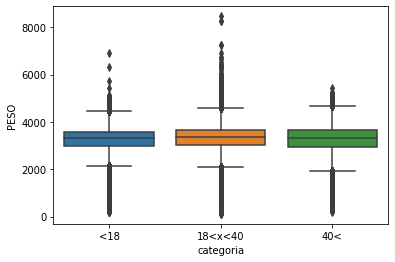

In [135]:
sns.boxplot(x="categoria", y="PESO", data=df_edadmadre)

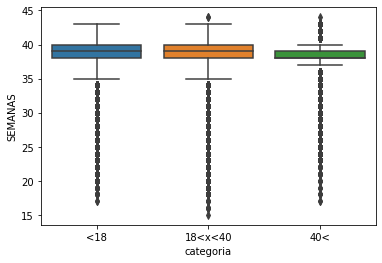

In [136]:
sns.boxplot(x="categoria", y="SEMANAS", data=df_edadmadre)

In [137]:
g1 = df_edadmadre.groupby(["ANO_NAC", "categoria"])['HIJ_TOTAL'].size().to_frame('suma')
g1

suma
ANO_NAC categoria        
2008    <18         28493
        18<x<40    212273
        40<          5615
2009    <18         28206
        18<x<40    217706
        40<          5823
2010    <18         26955
        18<x<40    217546
        40<          5767
2011    <18         25494
        18<x<40    215641
        40<          5851
2012    <18         24440
        18<x<40    213236
        40<          5593
2013    <18         22247
        18<x<40    213622
        40<          5737
2014    <18         20497
        18<x<40    223766
        40<          6221
2015    <18         17489
        18<x<40    220308
        40<          6417
2016    <18         13845
        18<x<40    210917
        40<          6453
2017    <18         11021
        18<x<40    201284
        40<          6508

Text(0.5, 0, 'Año')

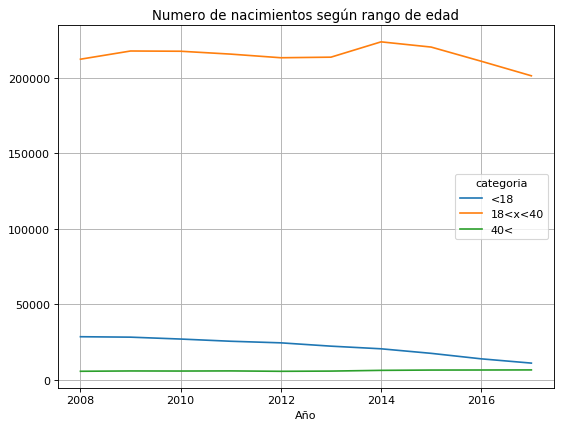

In [138]:
from matplotlib import pyplot as plt
f, a = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi= 80)
ax5 = g1.reset_index().pivot('ANO_NAC','categoria','suma').plot(ax=a, title='Numero de nacimientos según rango de edad', grid=True)
ax5.set_xlabel("Año")


Cabe destacar la disminución del embarazo infantil <18 a medida que avanza el tiempo